In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [3]:
diabetes=pd.read_csv("diabetes (1).csv")

In [4]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
diabetes.shape

(768, 9)

In [8]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

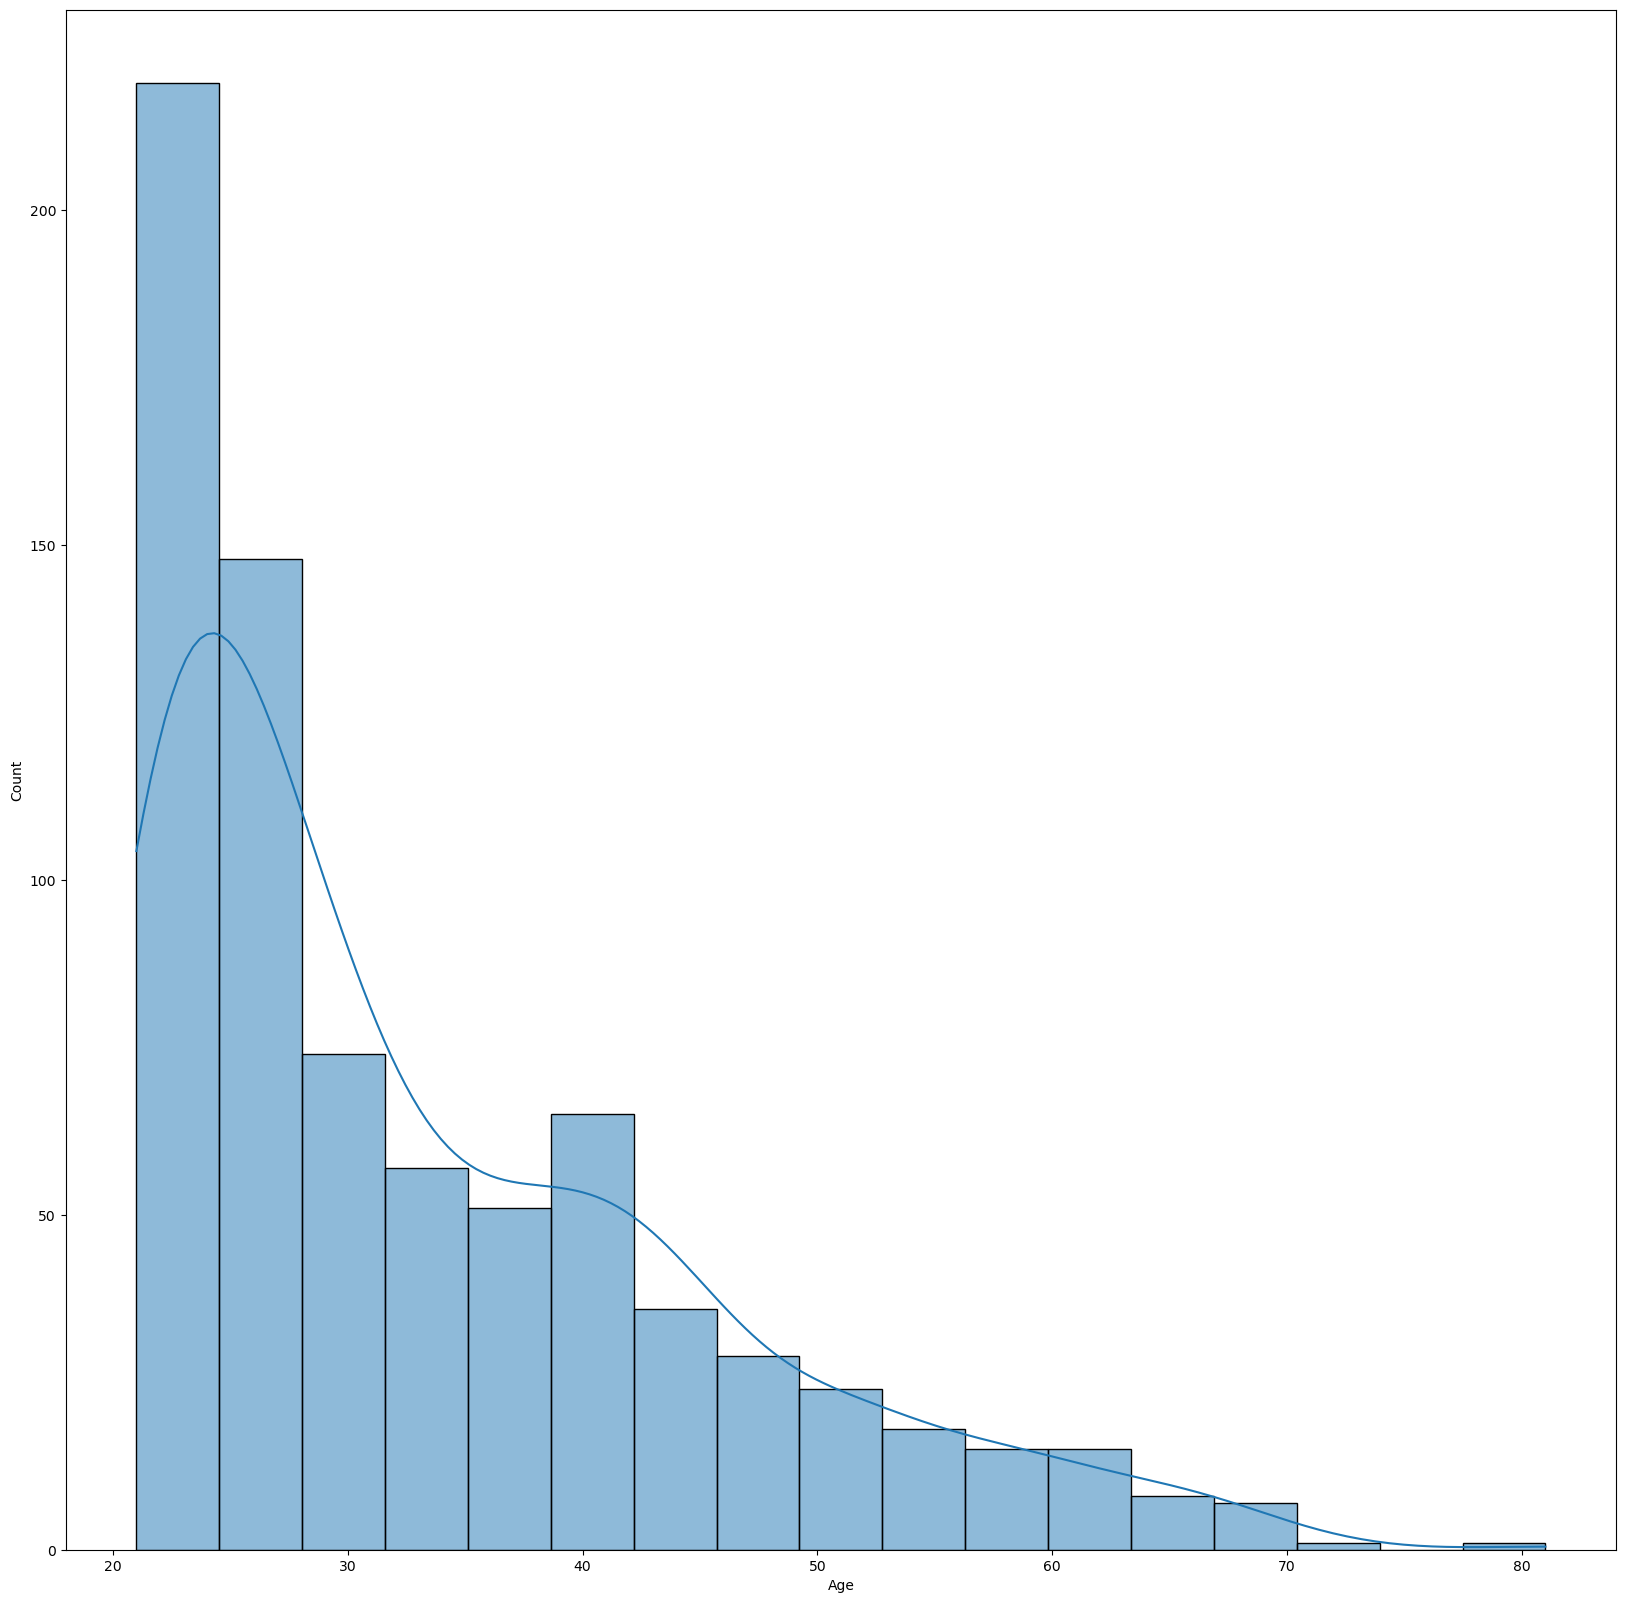

In [10]:
plt.figure(figsize=(20,20))
sns.histplot(x='Age',data=diabetes,kde=True)
plt.xlabel('Age')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

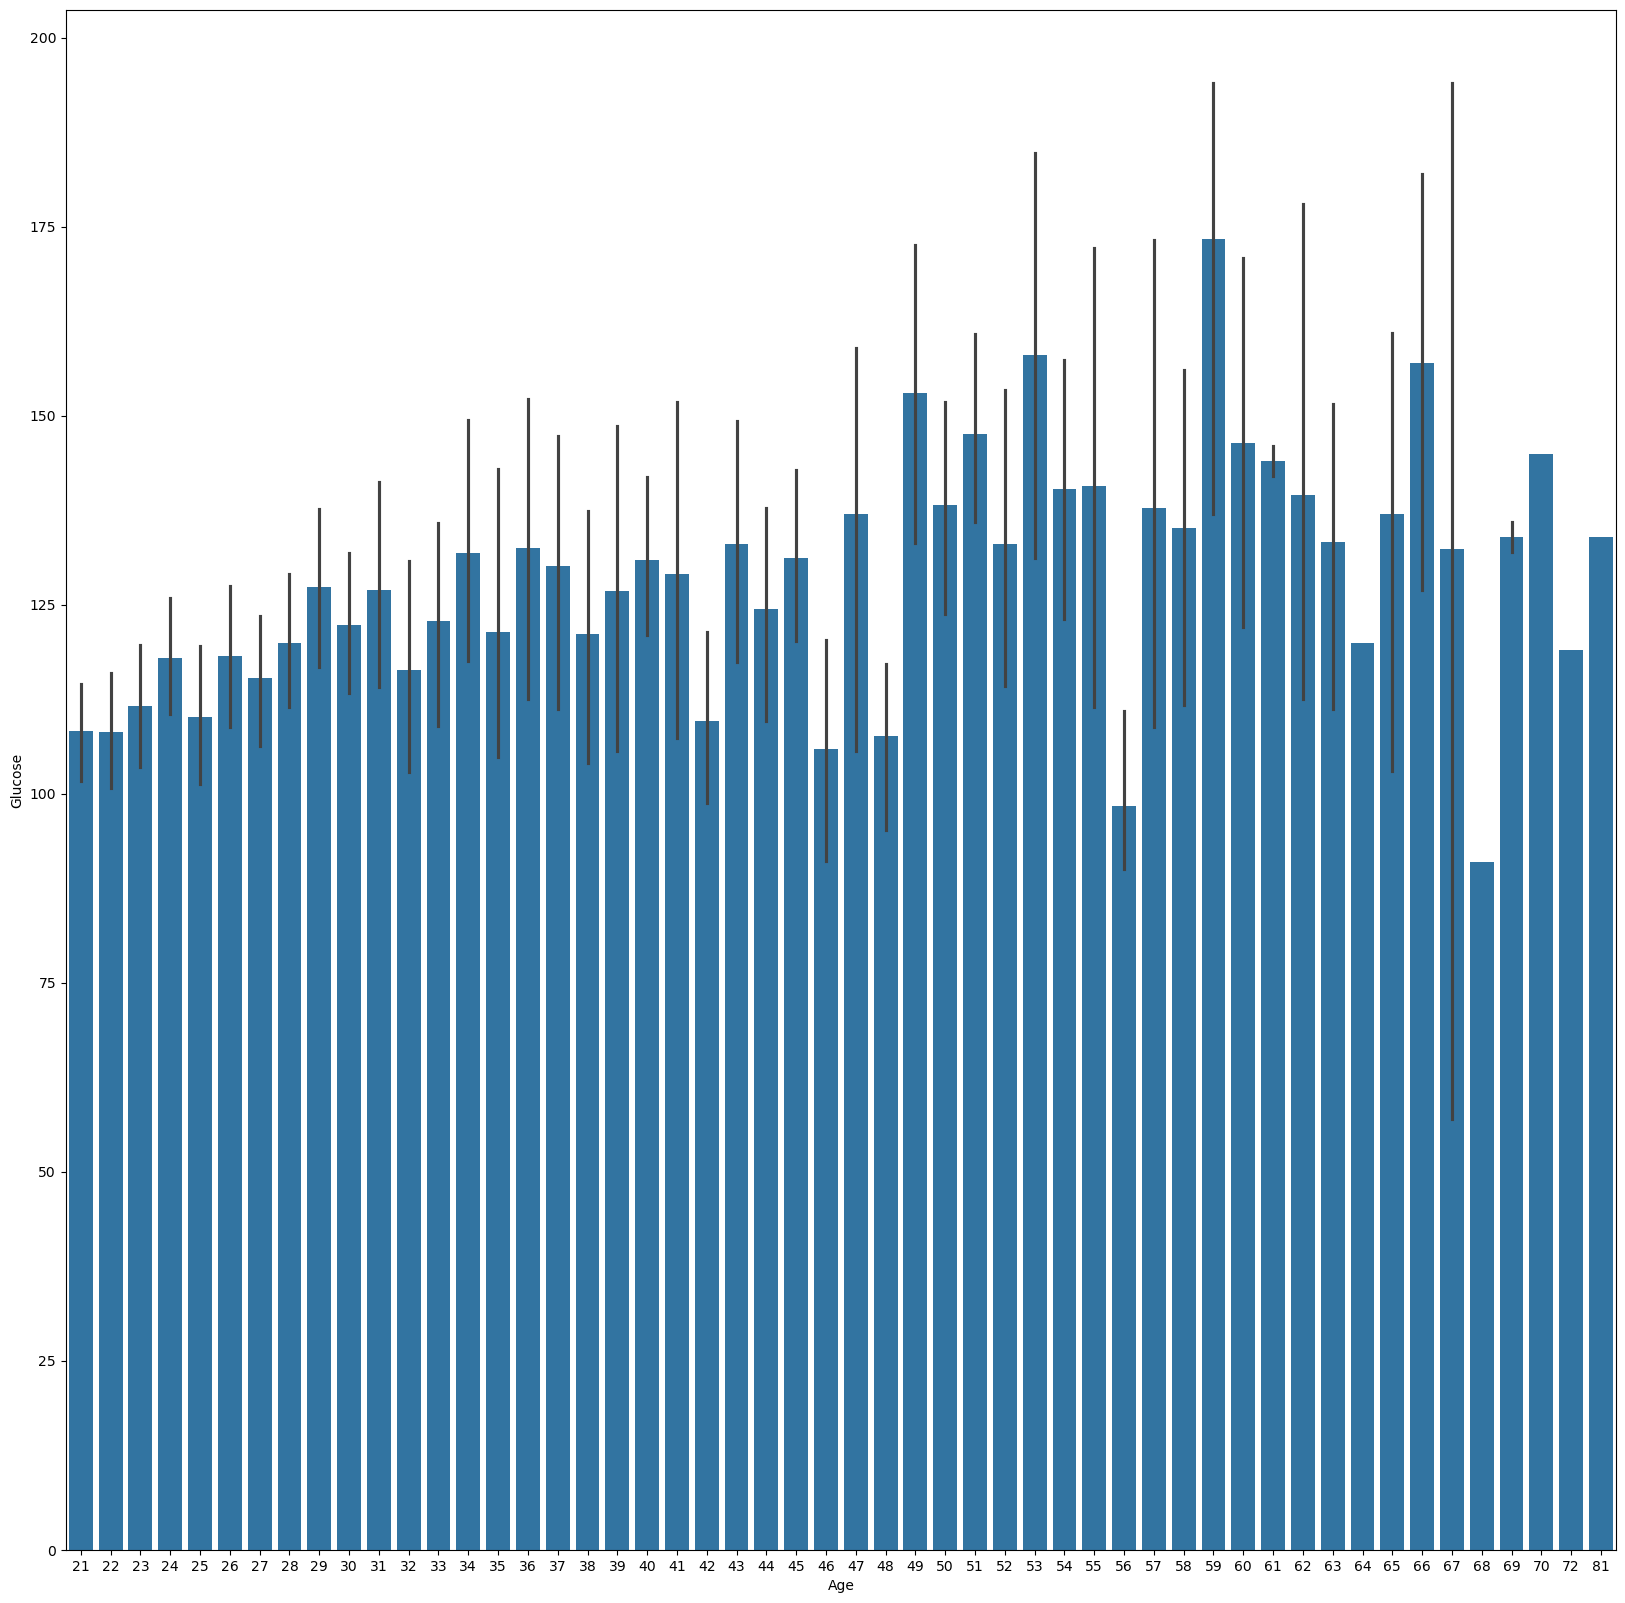

In [11]:
plt.figure(figsize=(20,20))
sns.barplot(x='Age',y='Glucose',data=diabetes)
plt.show

In [12]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
(diabetes == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [14]:
cols_with_zeros=['Glucose','BloodPressure','SkinThickness','Insulin','BMI']

In [15]:
#Replacing zeros with NAN(Not A Number)
diabetes[cols_with_zeros]=diabetes[cols_with_zeros].replace(0,np.nan)

In [16]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\1836233413.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['Glucose'])


<Axes: xlabel='Glucose', ylabel='Density'>

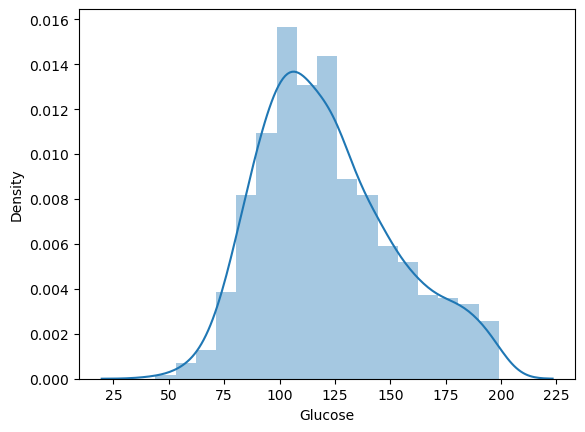

In [17]:
sns.distplot(diabetes['Glucose'])

In [18]:
diabetes['Glucose'].fillna(diabetes['Glucose'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\3670062185.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['Glucose'].fillna(diabetes['Glucose'].median(),inplace=True)


In [19]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\3292280391.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['BloodPressure'])


<Axes: xlabel='BloodPressure', ylabel='Density'>

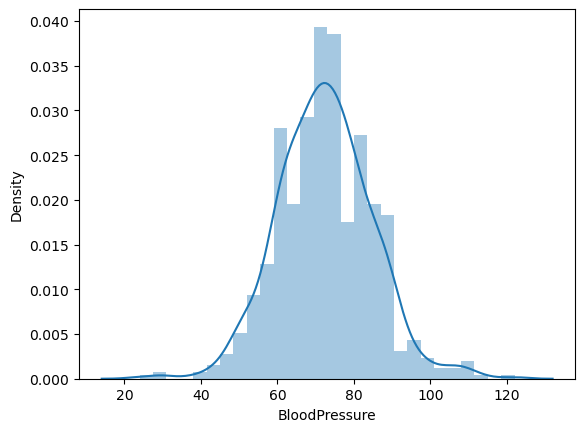

In [20]:
sns.distplot(diabetes['BloodPressure'])

In [21]:
diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\275548675.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['BloodPressure'].fillna(diabetes['BloodPressure'].mean(),inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2984\1739537931.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['SkinThickness'])


<Axes: xlabel='SkinThickness', ylabel='Density'>

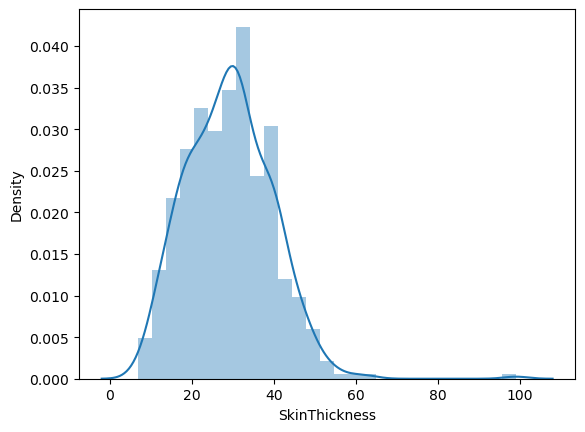

In [22]:
sns.distplot(diabetes['SkinThickness'])

In [23]:
diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\2584848369.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['SkinThickness'].fillna(diabetes['SkinThickness'].median(),inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2984\2314733975.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['Insulin'])


<Axes: xlabel='Insulin', ylabel='Density'>

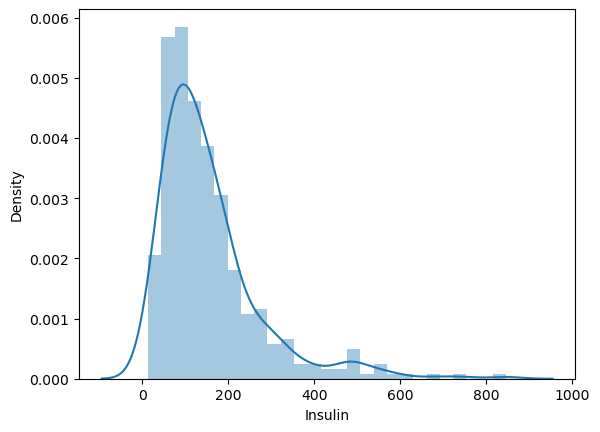

In [24]:
sns.distplot(diabetes['Insulin'])

In [25]:
diabetes['Insulin'].fillna(diabetes['Insulin'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\1203594194.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['Insulin'].fillna(diabetes['Insulin'].median(),inplace=True)


C:\Users\HP\AppData\Local\Temp\ipykernel_2984\3219906836.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diabetes['BMI'])


<Axes: xlabel='BMI', ylabel='Density'>

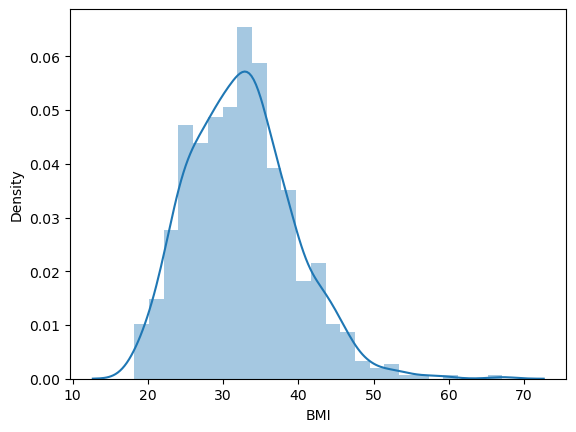

In [26]:
sns.distplot(diabetes['BMI'])

In [27]:
diabetes['BMI'].fillna(diabetes['BMI'].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2984\271241927.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  diabetes['BMI'].fillna(diabetes['BMI'].median(),inplace=True)


In [28]:
diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<Axes: >

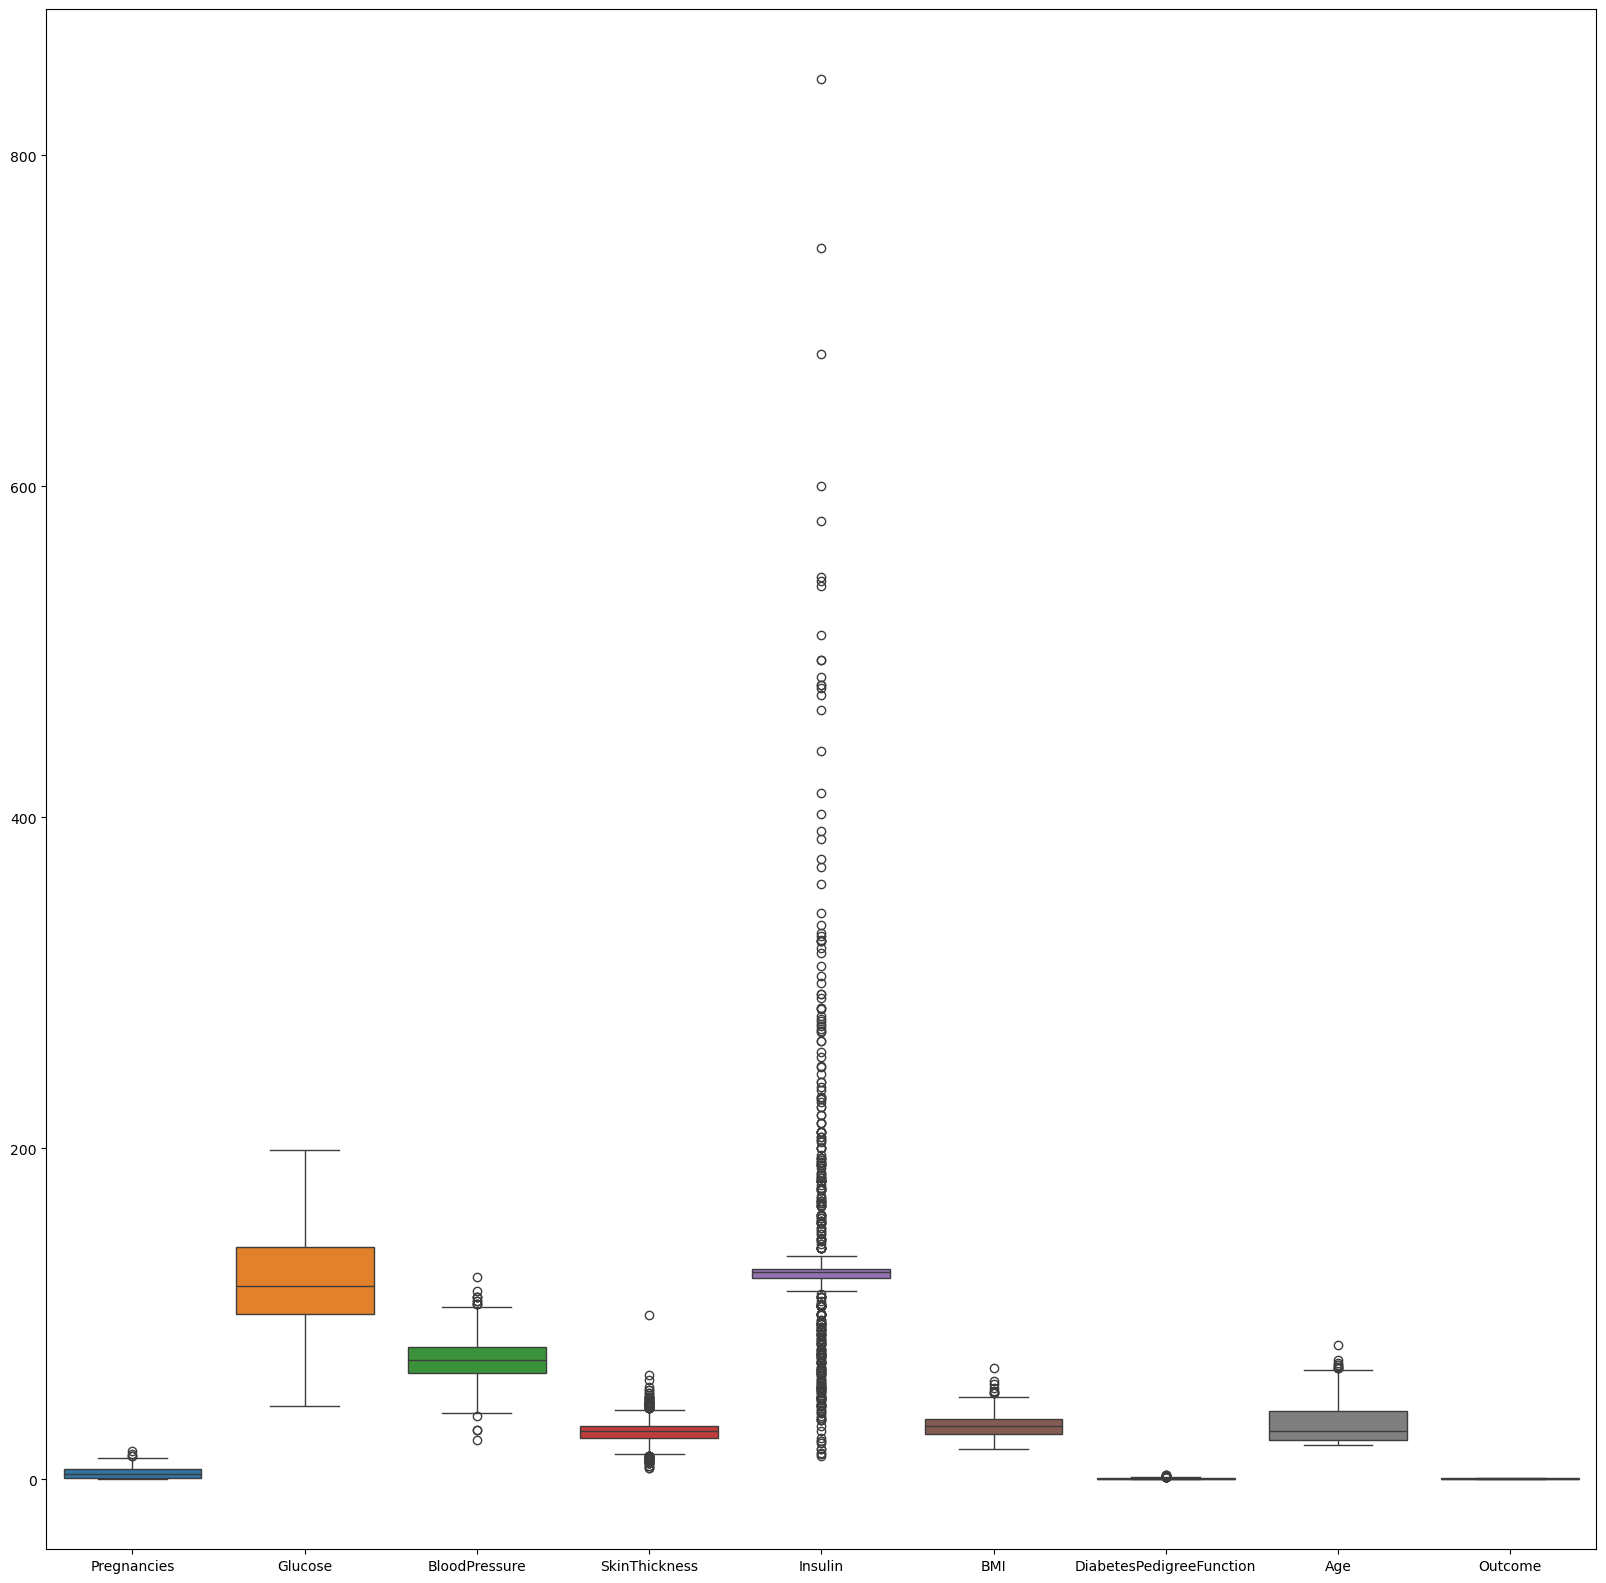

In [29]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=diabetes,ax=ax)

<Axes: xlabel='BloodPressure'>

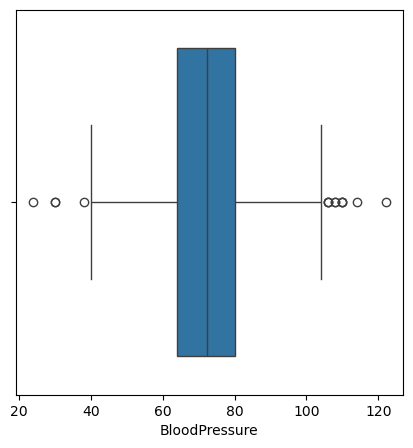

In [30]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(x=diabetes['BloodPressure'],ax=ax)

In [31]:
Q1=diabetes['BloodPressure'].quantile(0.25)
Q3=diabetes['BloodPressure'].quantile(0.75)

#Calculate the IQR - INTER QUARTILE RANGE
IQR=Q3-Q1

#Define the outliner boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

newdata = diabetes[(diabetes['BloodPressure']>= lower_bound)&(diabetes['BloodPressure']<=upper_bound)]

<Axes: xlabel='BloodPressure'>

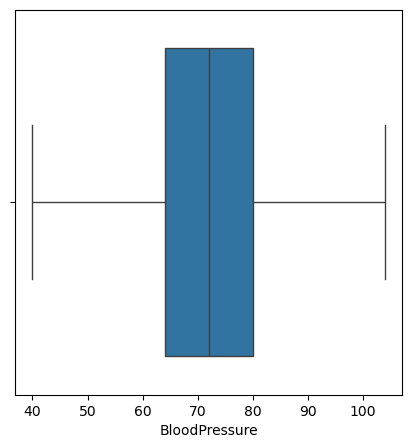

In [32]:
fig,ax=plt.subplots(figsize=(5,5))
sns.boxplot(x=newdata['BloodPressure'],ax=ax)

In [33]:
lower_bound

np.float64(40.0)

In [34]:
upper_bound

np.float64(104.0)

In [35]:
newdata

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [36]:
Q1=diabetes.quantile(0.25)
Q3=diabetes.quantile(0.75)

#Calculate the IQR - INTER QUARTILE RANGE
IQR=Q3-Q1

#Define the outliner boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Create a mask for data within the IQR boundaries
mask = ((diabetes < lower_bound) | (diabetes > upper_bound)).any(axis=1)

#Remove outliners
#cleaned_data = diabetes[mask]

In [37]:
cleaned_data = diabetes[mask]

In [38]:
cleaned_data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
12,10,139.0,80.0,29.0,125.0,27.1,1.441,57,0
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1
14,5,166.0,72.0,19.0,175.0,25.8,0.587,51,1
16,0,118.0,84.0,47.0,230.0,45.8,0.551,31,1
18,1,103.0,30.0,38.0,83.0,43.3,0.183,33,0
19,1,115.0,70.0,30.0,96.0,34.6,0.529,32,1


In [39]:
cleaned_data.shape

(393, 9)

In [40]:
mask

0      False
1      False
2      False
3       True
4       True
       ...  
763     True
764    False
765     True
766    False
767    False
Length: 768, dtype: bool

In [41]:
mask1 = ~mask


In [42]:
mask1

0       True
1       True
2       True
3      False
4      False
       ...  
763    False
764     True
765    False
766     True
767     True
Length: 768, dtype: bool

<Axes: >

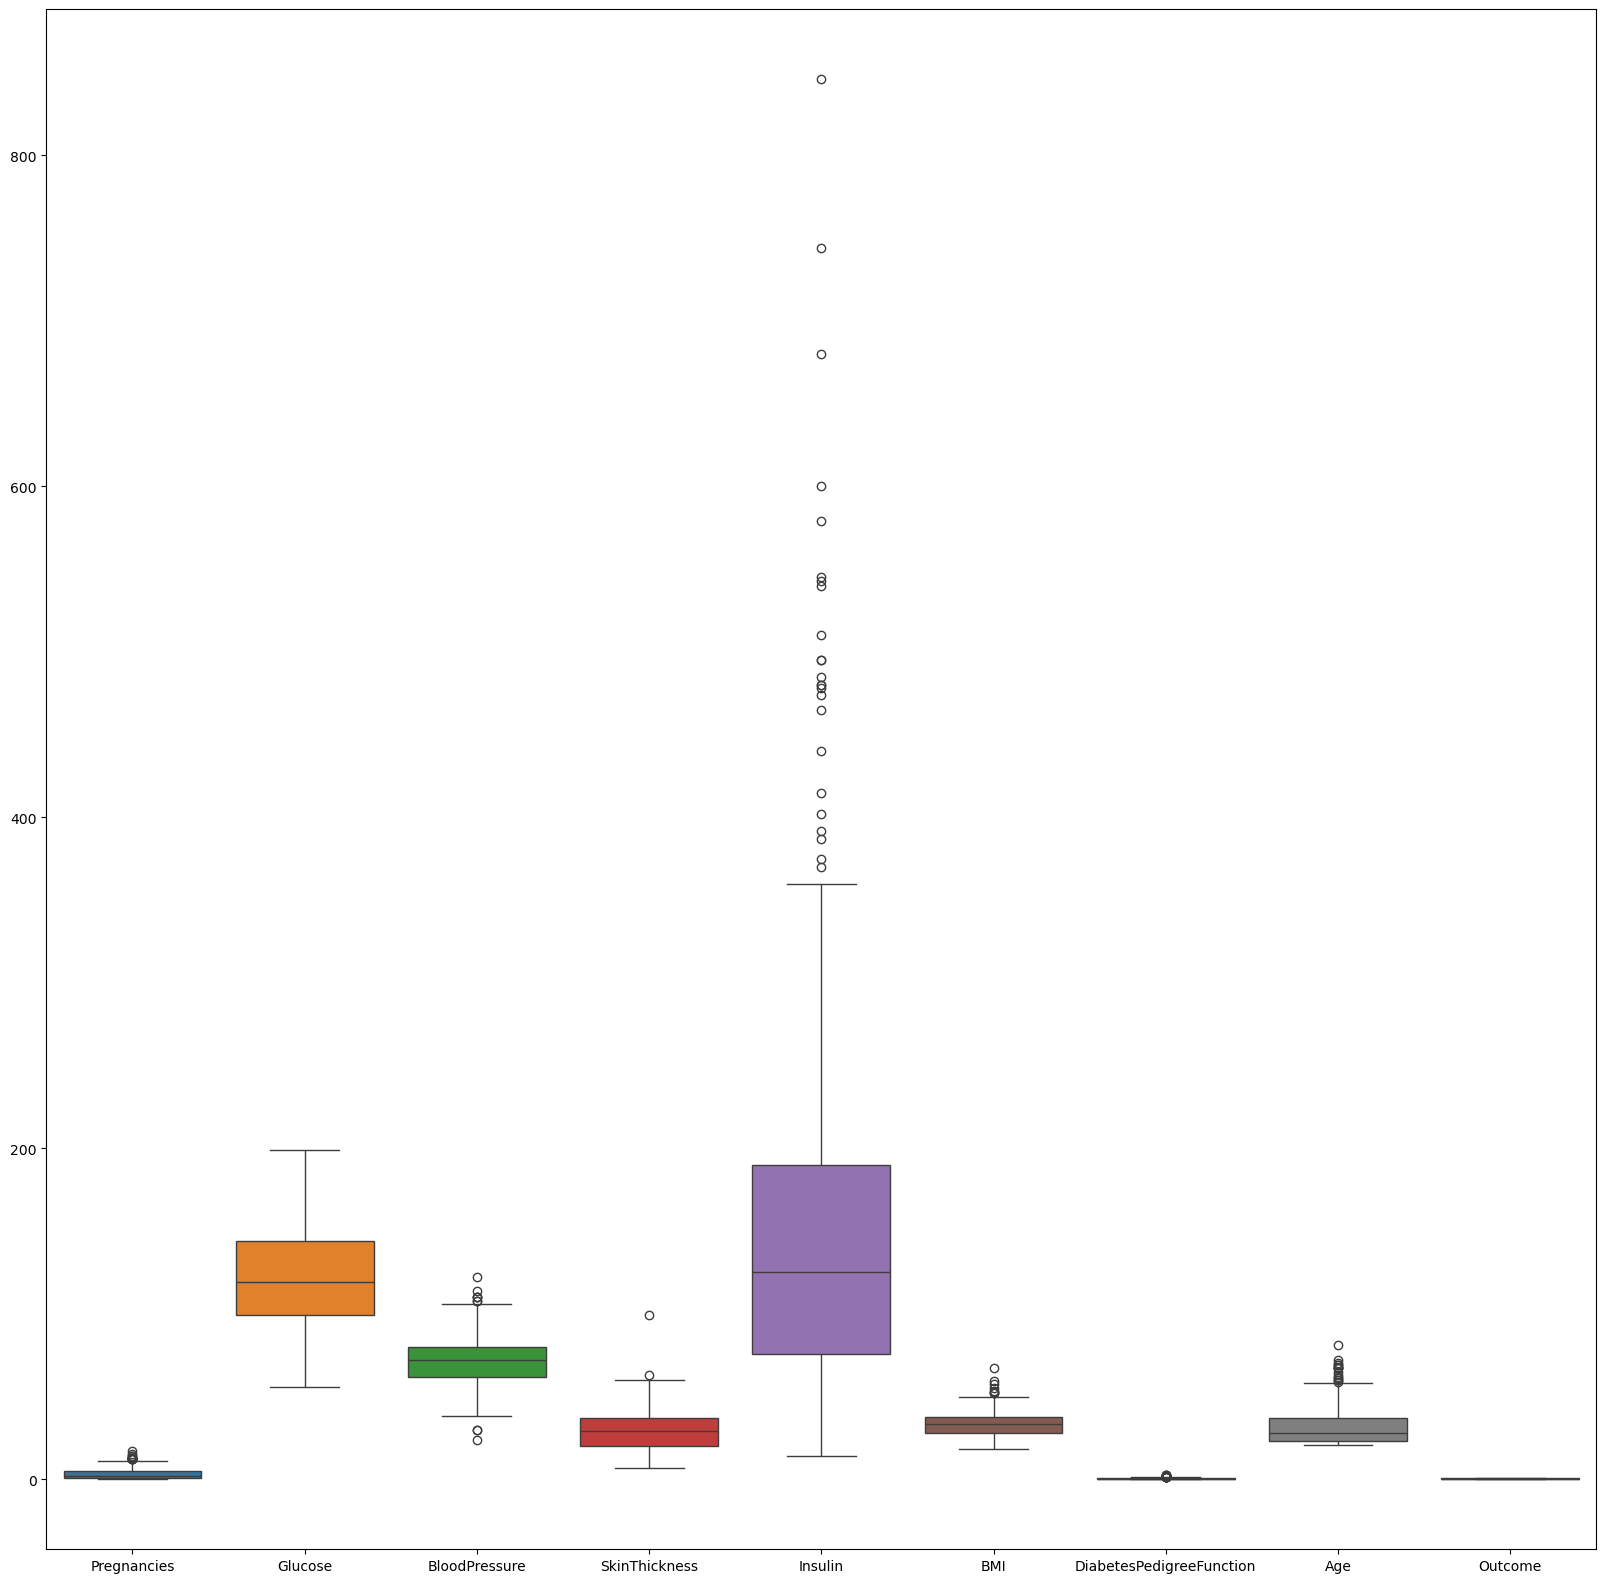

In [43]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(cleaned_data,ax=ax)

In [44]:
mask

0      False
1      False
2      False
3       True
4       True
       ...  
763     True
764    False
765     True
766    False
767    False
Length: 768, dtype: bool

In [45]:
lower_bound

Pregnancies                  -6.500
Glucose                      39.000
BloodPressure                40.000
SkinThickness                14.500
Insulin                     112.875
BMI                          13.850
DiabetesPedigreeFunction     -0.330
Age                          -1.500
Outcome                      -1.500
dtype: float64

In [46]:
upper_bound

Pregnancies                  13.500
Glucose                     201.000
BloodPressure               104.000
SkinThickness                42.500
Insulin                     135.875
BMI                          50.250
DiabetesPedigreeFunction      1.200
Age                          66.500
Outcome                       2.500
dtype: float64

In [47]:
cleaned_data1 = diabetes[mask1]

In [48]:
cleaned_data1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.000000,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.000000,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.000000,29.0,125.0,23.3,0.672,32,1
5,5,116.0,74.000000,29.0,125.0,25.6,0.201,30,0
7,10,115.0,72.405184,29.0,125.0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170.0,74.000000,31.0,125.0,44.0,0.403,43,1
762,9,89.0,62.000000,29.0,125.0,22.5,0.142,33,0
764,2,122.0,70.000000,27.0,125.0,36.8,0.340,27,0
766,1,126.0,60.000000,29.0,125.0,30.1,0.349,47,1


In [49]:
correlation = cleaned_data.corr()
correlation

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.197189,0.249360,0.076914,0.071412,0.031255,-0.011098,0.617516,0.244081
Glucose,0.197189,1.000000,0.231356,0.248076,0.555262,0.259604,0.164295,0.314367,0.511712
BloodPressure,0.249360,0.231356,1.000000,0.219875,0.069806,0.311639,-0.008325,0.328939,0.182501
SkinThickness,0.076914,0.248076,0.219875,1.000000,0.167026,0.641221,0.112472,0.174705,0.252122
Insulin,0.071412,0.555262,0.069806,0.167026,1.000000,0.213183,0.101541,0.164226,0.302724
BMI,0.031255,0.259604,0.311639,0.641221,0.213183,1.000000,0.134638,0.062110,0.323469
DiabetesPedigreeFunction,-0.011098,0.164295,-0.008325,0.112472,0.101541,0.134638,1.000000,0.084589,0.197985
Age,0.617516,0.314367,0.328939,0.174705,0.164226,0.062110,0.084589,1.000000,0.286845
Outcome,0.244081,0.511712,0.182501,0.252122,0.302724,0.323469,0.197985,0.286845,1.000000


<Axes: >

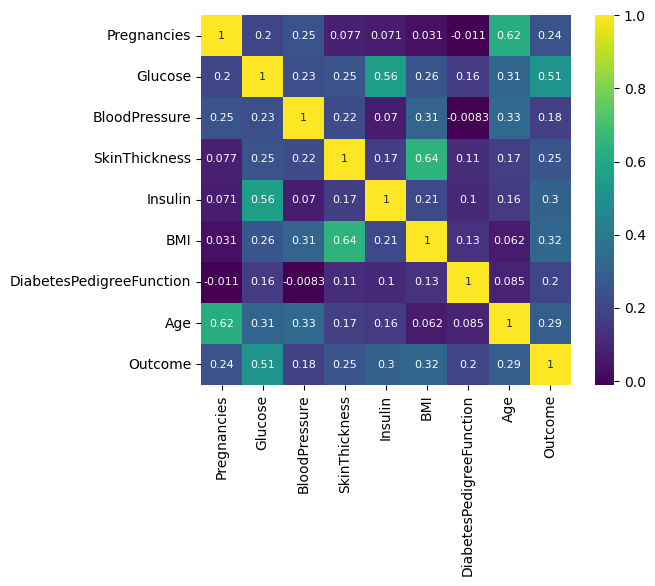

In [50]:
sns.heatmap(correlation,cbar=True,square=True,annot=True,annot_kws={'size':8},cmap='viridis')

In [51]:
cleaned_data['Outcome'].value_counts()

Outcome
0    263
1    130
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

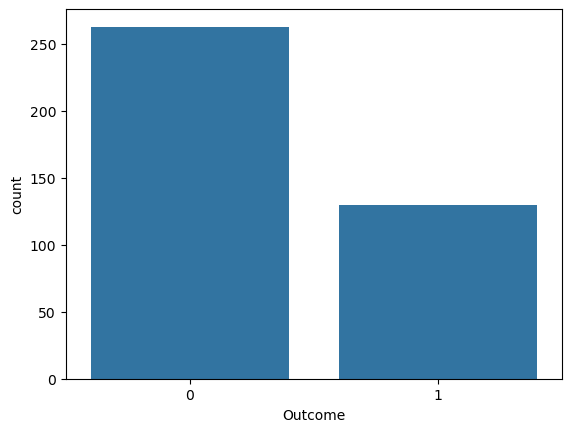

In [52]:
sns.countplot(x='Outcome',data=cleaned_data)

In [53]:
x=cleaned_data.drop('Outcome',axis=1)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53
12,10,139.0,80.0,29.0,125.0,27.1,1.441,57
...,...,...,...,...,...,...,...,...
753,0,181.0,88.0,44.0,510.0,43.3,0.222,26
755,1,128.0,88.0,39.0,110.0,36.5,1.057,37
760,2,88.0,58.0,26.0,16.0,28.4,0.766,22
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63


In [54]:
y=cleaned_data['Outcome']
y

3      0
4      1
6      1
8      1
12     0
      ..
753    1
755    1
760    0
763    0
765    0
Name: Outcome, Length: 393, dtype: int64

In [55]:
from imblearn.over_sampling import SMOTE
#SYNTHETIC MINORITY OVERSAMPLING TECHNIQUES - SMOTE

In [56]:
smote=SMOTE()
x_resampled, y_resampled = smote.fit_resample(x,y)

In [57]:
x_resampled.shape

(526, 8)

In [58]:
x.shape

(393, 8)

In [59]:
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,test_size=0.3,random_state=42)

In [66]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((368, 8), (158, 8), (368,), (158,))

model= LogisticRegression()

In [71]:
model = LogisticRegression()

In [72]:
model.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [73]:
train_data_predict = model.predict(x_train)
train_data_accuracy = accuracy_score(train_data_predict,y_train)
print('Accuracy of training data',train_data_accuracy)

Accuracy of training data 0.7608695652173914


In [74]:
test_data_predict = model.predict(x_test)
test_data_accuracy = accuracy_score(test_data_predict,y_test)
print('Accuracy of testing data',test_data_accuracy)

Accuracy of testing data 0.740506329113924


In [75]:
cm= confusion_matrix(test_data_predict,y_test)
cm

array([[58, 24],
       [17, 59]])

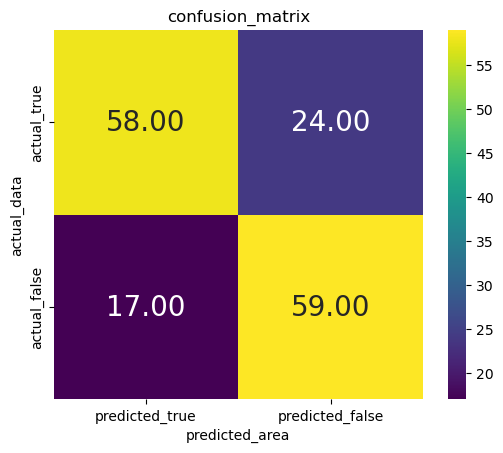

In [77]:
sns.heatmap(cm,annot=True,annot_kws= {'size':20},fmt='.2f',cmap ='viridis',square = True,
            xticklabels=['predicted_true','predicted_false'],
            yticklabels=['actual_true','actual_false'])
plt.xlabel('predicted_area')
plt.ylabel('actual_data')
plt.title('confusion_matrix')
plt.show()

In [78]:
#F1=2*(PR/(P+R))

In [79]:
print(classification_report(test_data_predict,y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74        82
           1       0.71      0.78      0.74        76

    accuracy                           0.74       158
   macro avg       0.74      0.74      0.74       158
weighted avg       0.74      0.74      0.74       158



In [81]:
new_data = (2	,88.0	,58.0	,26.0	,16.0	,28.4	,0.766	,22)
new_data_as_np = np.asarray(new_data)
new_data_reshaped = new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('The person is non diabetic')
else:
    print('The person is diabetic')

The person is non diabetic


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
